<a href="https://www.kaggle.com/code/fariskarim/complete-eda-fe-and-predictions?scriptVersionId=139346887" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/car-price/CarPrice_Assignment.csv
/kaggle/input/car-price/Data Dictionary - carprices.xlsx


In [2]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/kaggle/input/car-price/CarPrice_Assignment.csv')
data = shuffle(data,random_state=1)

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
78,79,2,mitsubishi outlander,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669.0
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
151,152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0
44,45,1,isuzu D-Max,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295.0


#### No null values

In [5]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### Perform some EDA 

This step mainly helped me find the relationship between variables I wasn't familiar with and the price

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

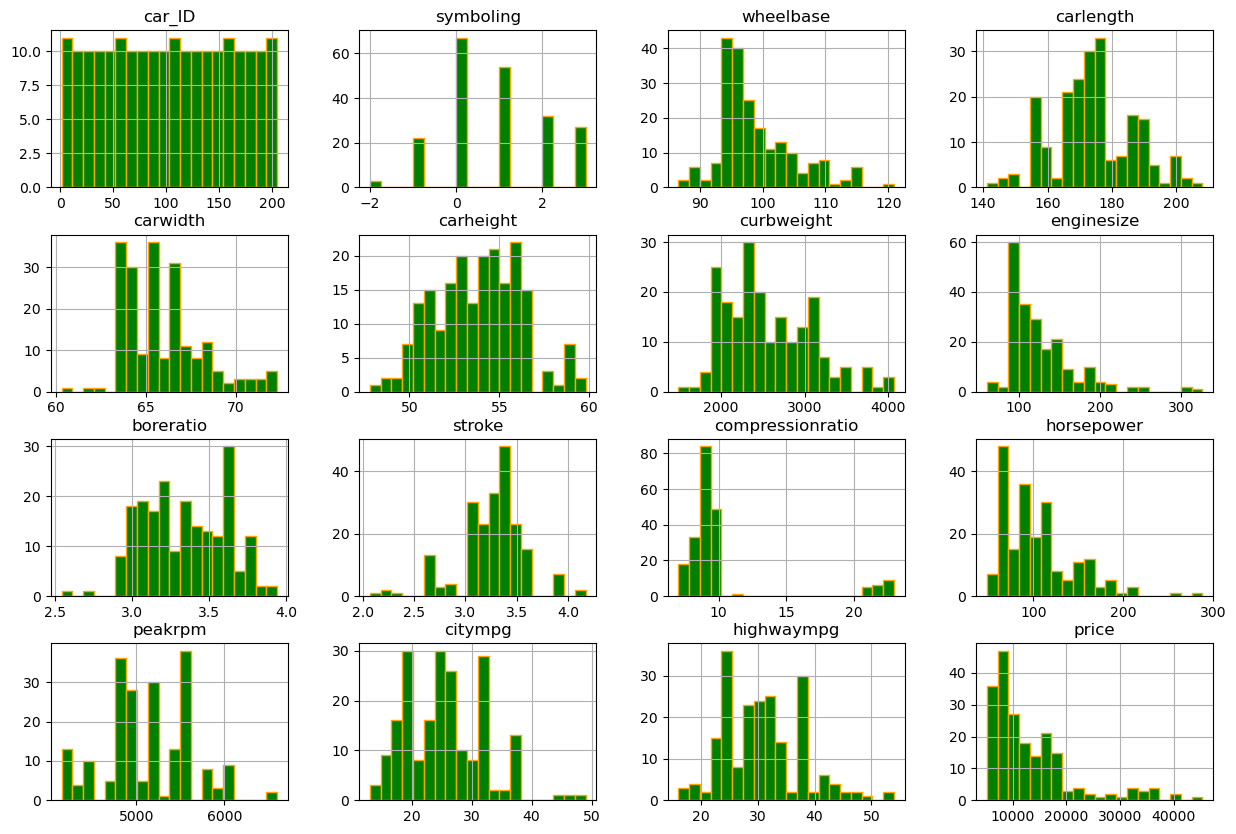

In [7]:
data.hist(bins=20, figsize =(15,10), color= 'green', edgecolor='orange')

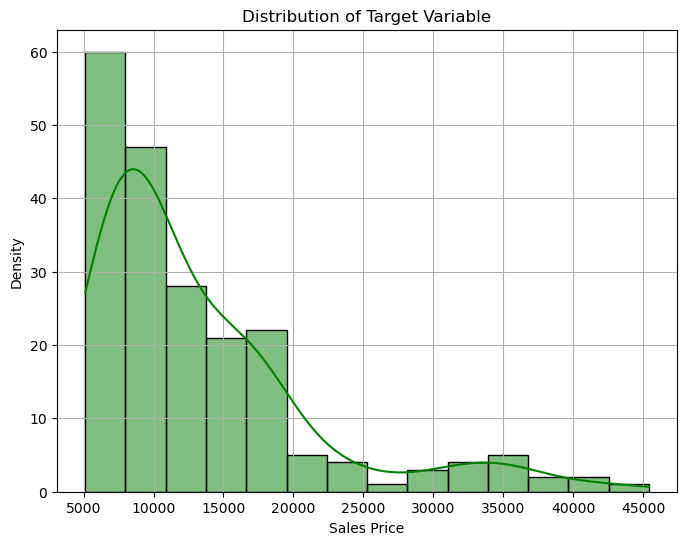

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, color='green')
plt.title('Distribution of Target Variable')
plt.xlabel('Sales Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

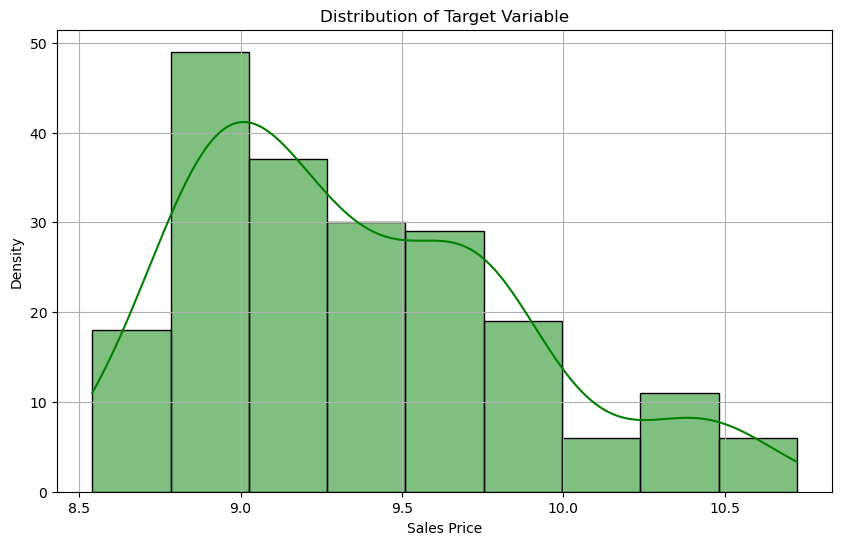

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['price']), kde=True, color='green')
plt.title('Distribution of Target Variable')
plt.xlabel('Sales Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#### Target variable is skewed, consider using the log transformed target variable

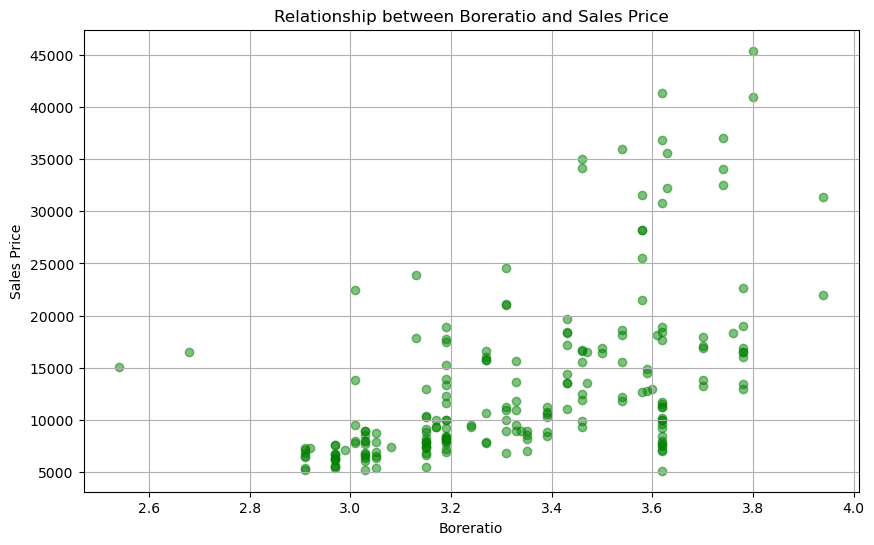

In [10]:


plt.figure(figsize=(10, 6))
plt.scatter(data['boreratio'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between Boreratio and Sales Price')
plt.xlabel('Boreratio')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

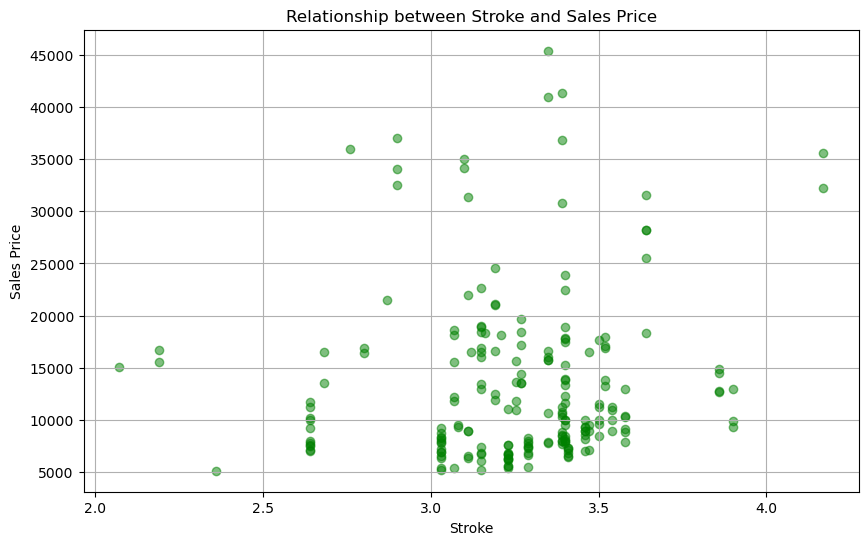

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data['stroke'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between Stroke and Sales Price')
plt.xlabel('Stroke')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

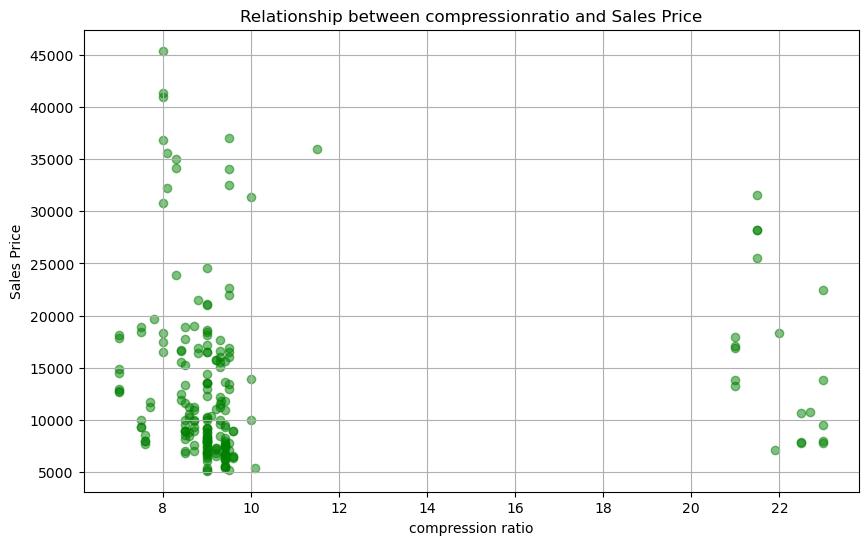

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data['compressionratio'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between compressionratio and Sales Price')
plt.xlabel('compression ratio')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

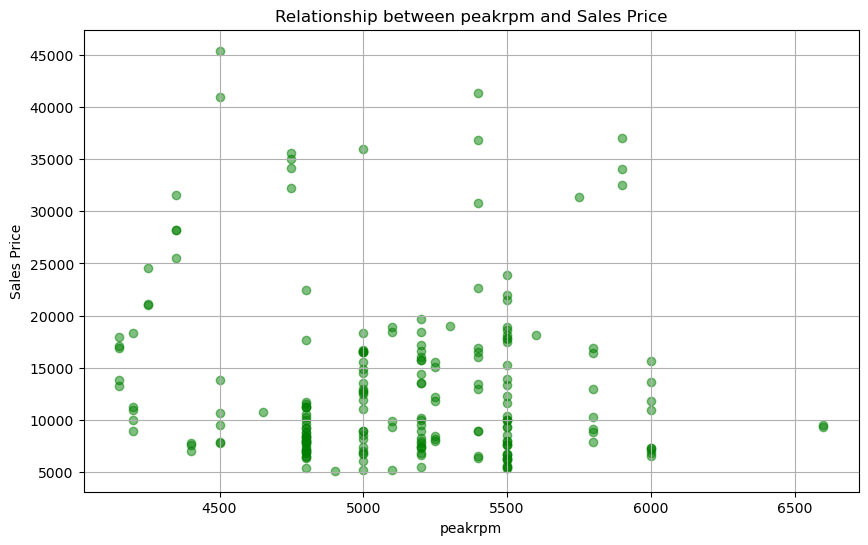

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['peakrpm'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between peakrpm and Sales Price')
plt.xlabel('peakrpm')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

In [14]:
correlation = data.corr()

corr_target = correlation['price'].sort_values(ascending=False)
corr_target

/tmp/ipykernel_20/3291880280.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

#### Creating a new feature which groups the car names by their brands

In [15]:
data['CarBrand'] = data['CarName'].apply(lambda x: 'Alfa-romero' if 'alfa-romero' in x.lower() else 
                                         ('Chevrolet' if 'chevrolet' in x.lower() else 
                                          ('Dodge' if 'dodge' in x.lower() else 
                                           ('Audi' if 'audi' in x.lower() else 
                                            ('Honda' if 'honda' in x.lower() else 
                                             ('Isuzu' if 'isuzi' in x.lower() else 
                                              ('Jaguar' if 'jaguar' in x.lower() else 
                                               ('Mazda' if 'mazda' in x.lower() or 'maxda' in x.lower() else
                                                ('Mercury' if 'mercury'in x.lower() else
                                                ('Mitsubishi' if 'mitsubishi'in x.lower() else
                                                 ('Nissan' if 'nissan' in x.lower() else
                                                  ('Peugeot' if 'peugeot' in x.lower() else
                                                   ('Plymouth'if 'plymouth' in x.lower() else
                                                    ('Porsche' if 'porsche' in x.lower() else
                                                     ('Renault' if 'renault' in x.lower() else
                                                      ('Saab' if 'saab' in x.lower() else
                                                       ('Subaru' if 'subaru' in x.lower() else
                                                        ('Toyota' if 'toyota' in x.lower() else
                                                         ('Volkswagen' if 'volkswagen' in x.lower() or 'vw' in x.lower() else
                                                          ('Volvo' if 'volvo' in x.lower() else
                                                           ('Buick' if 'buick' in x.lower() else
                                                            ('BMW' if 'bmw' in x.lower() else None))))))))))))))))))))))


In [16]:
data['CarBrand'].value_counts()

Toyota         31
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Subaru         12
Volvo          11
Peugeot        11
Volkswagen     11
Dodge           9
BMW             8
Buick           8
Audi            7
Plymouth        7
Saab            6
Porsche         4
Chevrolet       3
Jaguar          3
Alfa-romero     3
Renault         2
Mercury         1
Name: CarBrand, dtype: int64

In [17]:
corr_target

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

#### Drop irrelevant columns; some of the columns dropped you might include, this is subjective

In [18]:
data_cleaned = data.drop(columns=['symboling','car_ID','compressionratio','stroke','peakrpm','carheight','CarName'])

In [19]:
data_cleaned.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarBrand
78,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,2004,ohc,four,92,2bbl,2.97,68,31,38,6669.0,Mitsubishi
97,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,2037,ohc,four,97,2bbl,3.15,69,31,37,7999.0,Nissan
151,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,2040,ohc,four,92,2bbl,3.05,62,31,38,6338.0,Toyota
44,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,1874,ohc,four,90,2bbl,3.03,70,38,43,8916.5,None
40,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,2372,ohc,four,110,1bbl,3.15,86,27,33,10295.0,Honda


In [20]:
data_cleaned = pd.get_dummies(data_cleaned)

In [21]:
data_cleaned.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,CarBrand_Nissan,CarBrand_Peugeot,CarBrand_Plymouth,CarBrand_Porsche,CarBrand_Renault,CarBrand_Saab,CarBrand_Subaru,CarBrand_Toyota,CarBrand_Volkswagen,CarBrand_Volvo
78,93.7,157.3,64.4,2004,92,2.97,68,31,38,6669.0,...,0,0,0,0,0,0,0,0,0,0
97,94.5,170.2,63.8,2037,97,3.15,69,31,37,7999.0,...,1,0,0,0,0,0,0,0,0,0
151,95.7,158.7,63.6,2040,92,3.05,62,31,38,6338.0,...,0,0,0,0,0,0,0,1,0,0
44,94.5,155.9,63.6,1874,90,3.03,70,38,43,8916.5,...,0,0,0,0,0,0,0,0,0,0
40,96.5,175.4,62.5,2372,110,3.15,86,27,33,10295.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data_cleaned.shape

(205, 69)

In [23]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']


In [24]:
y.head()

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
Name: price, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (164, 68)
X_test shape: (41, 68)
y_train shape: (164,)
y_test shape: (41,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


linear_model = LinearRegression()

mse_scores = cross_val_score(linear_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
# Calculate RMSE scores for each fold
rmse_scores = np.sqrt(-mse_scores)

print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE score:", rmse_scores.mean())

RMSE scores for each fold: [3092.49294684 3933.59756184 3287.79134639]
Mean RMSE score: 3437.960618357692


#### Now lets try out a RandomForest

In [27]:

n_estimators_values = [50, 100, 200, 300]
results = []

for n_estimators in n_estimators_values:
    random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    mse_scores = cross_val_score(random_forest_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)
    
    mean_rmse = rmse_scores.mean()
    results.append((n_estimators, mean_rmse))
    
    print(f"n_estimators = {n_estimators}, Mean RMSE = {mean_rmse}")

best_n_estimators, best_mean_rmse = min(results, key=lambda x: x[1])
print(f"Best n_estimators: {best_n_estimators}, Best Mean RMSE: {best_mean_rmse}")

n_estimators = 50, Mean RMSE = 2941.539522607129
n_estimators = 100, Mean RMSE = 2764.51020820709
n_estimators = 200, Mean RMSE = 2720.974281598938
n_estimators = 300, Mean RMSE = 2725.298404775624
Best n_estimators: 200, Best Mean RMSE: 2720.974281598938


#### n_estimators = 200 gives the lowest RMSE, so we are going to train the model a final time using all the training data

In [28]:
final_model = RandomForestRegressor(n_estimators=200, random_state=42)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

mse_final = mean_squared_error(y_pred, y_test)

rmse_final = np.sqrt(mse_final)
r2_test = r2_score(y_test, y_pred)

print("RMSE:      ", rmse_final)
print("R-squared:   ", r2_test)


RMSE:       1096.905492201353
R-squared:    0.9817160725762963


#### RMSE of ~1100! Not bad!

##### Always looking to improve and plan to add on the modeling selection by using GridSearch and more regression models. Any tips would be appreciated!